In [2]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('data/data.csv')
df.tail()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 28, saw 367


In [75]:
# df.date.unique()

In [76]:
# df.columns

In [77]:
# df.dtypes

In [78]:
df.drop_duplicates(subset="date", keep="last", inplace=True)

In [79]:
df.tail()

,date,time,min_temp,max_temp,avg_temp,humidity,AQI,baro_pressure
3959,2022-12-12,23:00:00,10.2,14.2,12.2,92.88,269,1014.1
3983,2022-12-13,23:00:00,11.1,15.1,13.1,28.74,272,1016.0
4007,2022-12-14,23:00:00,9.6,11.8,10.7,34.02,273,1016.0
4031,2022-12-15,23:00:00,9.6,12.2,10.9,39.55,270,1014.0
4055,2022-12-16,23:00:00,9.5,11.9,10.7,41.95,271,1016.0


In [80]:
df ['date'] = pd.to_datetime(df['date'])
df.tail()

,date,time,min_temp,max_temp,avg_temp,humidity,AQI,baro_pressure
3959,2022-12-12,23:00:00,10.2,14.2,12.2,92.88,269,1014.1
3983,2022-12-13,23:00:00,11.1,15.1,13.1,28.74,272,1016.0
4007,2022-12-14,23:00:00,9.6,11.8,10.7,34.02,273,1016.0
4031,2022-12-15,23:00:00,9.6,12.2,10.9,39.55,270,1014.0
4055,2022-12-16,23:00:00,9.5,11.9,10.7,41.95,271,1016.0


In [82]:
# df.dtypes

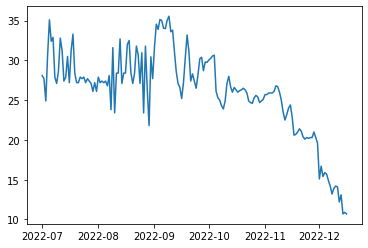

In [83]:
plt.plot(df['date'], df['avg_temp'])
plt.show()

In [86]:
new_column = df[['date', 'avg_temp']] 
new_column.dropna(inplace=True)
new_column.columns = ['ds', 'y'] 
new_column.tail()

,ds,y
3959,2022-12-12,12.2
3983,2022-12-13,13.1
4007,2022-12-14,10.7
4031,2022-12-15,10.9
4055,2022-12-16,10.7


In [91]:
n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=3000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.408% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (11) is too small than the required number for the learning rate finder (210). The results might not be optimal.


Finding best initial lr:   0%|          | 0/210 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [98]:
future = n.make_future_dataframe(new_column, periods=12)
forecast = n.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.408% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 91.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 91.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 11it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_weekly
0,2022-12-17,None,11.529460,11.764352,-0.234892
1,2022-12-18,None,11.365670,11.433267,-0.067596
2,2022-12-19,None,11.499668,11.102170,0.397499
3,2022-12-20,None,11.638874,10.771085,0.867789
4,2022-12-21,None,10.106853,10.439999,-0.333145


In [101]:
plot = n.plot(forecast)
# n.set_plotting_backend('plotly')

In [1]:
plot

NameError: name 'plot' is not defined